In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, auc


from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [ ]:
def wrangle(path):
  df = pd.read_csv(path)
  df.dropna(inplace=True)
  return df

In [ ]:
df = wrangle("creditcard.csv")

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,...,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,...,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,...,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,...,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,...,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,...,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Columns (Features): Time, V1, V2, V3, ..., V28: These are feature columns in the dataset.

Features **V1 to V28** are the result of a PCA transformation (to protect data privacy). These features are scaled as part of PCA, and their mean values are close to 0 (which is typical after applying PCA).




 **Time**: represents the time difference in seconds from the first transaction.

* [The minimum value of Time is 0, which represents the start of the recorded transactions.The maximum value is 172,792 seconds (approx. 48 hours), which means the data spans roughly two days.]

**Amount**: Represents the transaction amount.

**Class**: The label for whether the transaction is fraud (1) or non-fraud (0).

Overall: The describe() output shows that the dataset is clean (no missing values) and well-processed, with scaled features thanks to PCA. The next steps would likely involve balancing the dataset (as fraud cases are a minority), applying modeling techniques, and tuning the model based on this summary understanding.

In [ ]:
round(df["Class"].value_counts(normalize = True)*100,2)

,proportion
Class,
0,99.83
1,0.17


Our original data is imbalanced! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

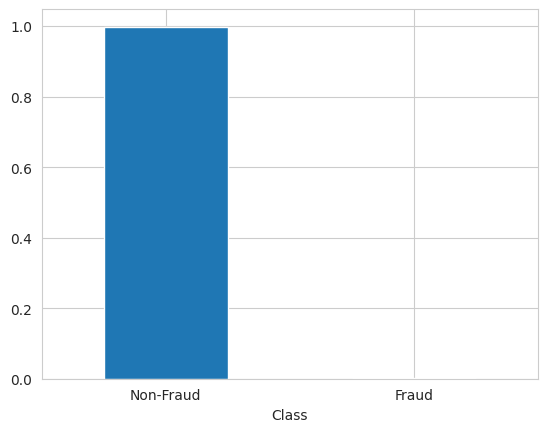

In [ ]:
df["Class"].value_counts(normalize = True).plot(kind="bar");
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0);

#FEATURE ANALYSIS : TIME

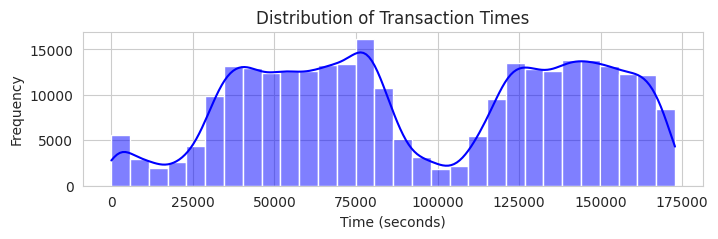

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 2))
sns.histplot(df['Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()



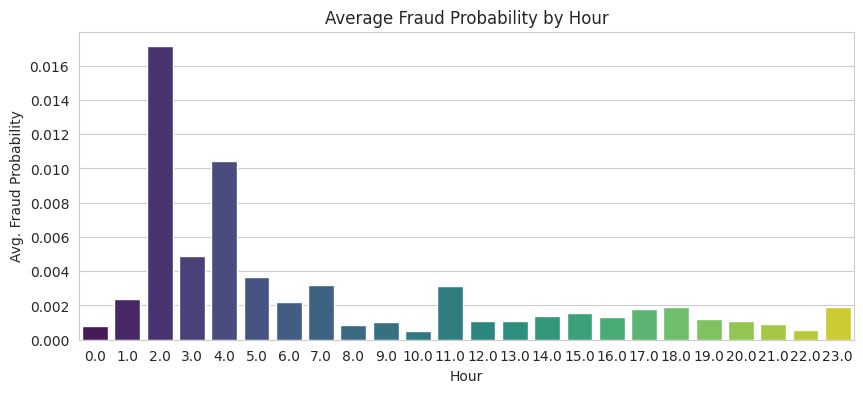

In [ ]:
# convert 'Time' from seconds to hours for better analysis
df['Hour'] = (df['Time'] //  3600) % 24

# caluclate the mean fruad probability by hour
hour_fraud = df.groupby('Hour')['Class'].mean().reset_index()

# plotting the average fruad probability by hour
plt.figure(figsize=(10, 4));
sns.barplot(data=hour_fraud, x='Hour', y='Class', palette='viridis');
plt.title('Average Fraud Probability by Hour');
plt.xlabel("Hour");
plt.ylabel("Avg. Fraud Probability");
plt.xticks(range(0, 24));

The results (e.g., average fraud probability by "hour") are based on a relative timeline, not absolute real-world time.

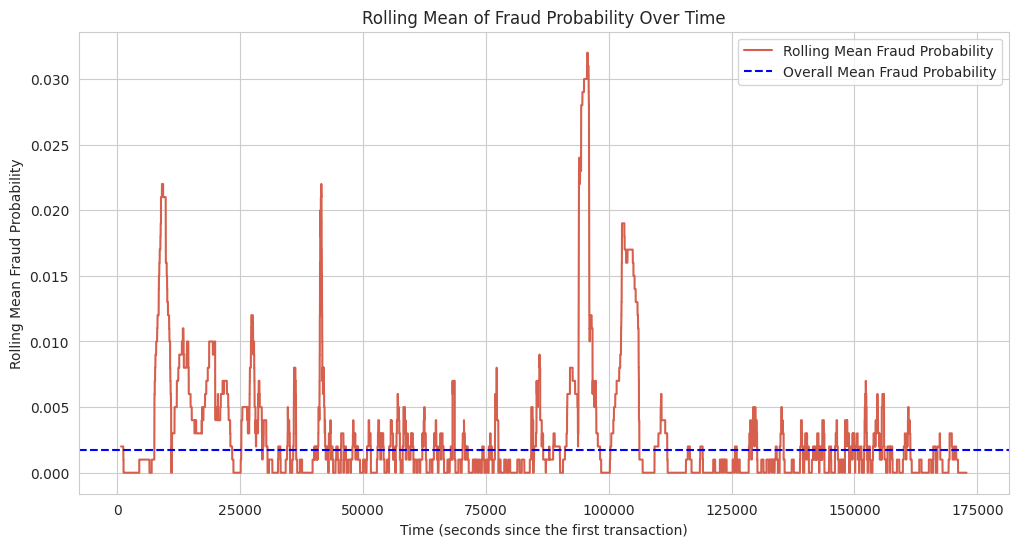

In [ ]:
# create a rolling mean to identify spikes in fraud

df['Fraud_Spike'] = df['Class'].rolling(window=1000).mean()  # Window size can be adjusted

# Plotting the rolling mean of fraud over time
plt.figure(figsize=(12, 6));
plt.plot(df['Time'], df['Fraud_Spike'], color='#d6604d', label='Rolling Mean Fraud Probability');
plt.title('Rolling Mean of Fraud Probability Over Time');
plt.xlabel('Time (seconds since the first transaction)');
plt.ylabel('Rolling Mean Fraud Probability');
plt.axhline(y=df['Class'].mean(), color='blue', linestyle='--', label='Overall Mean Fraud Probability');
plt.legend();

Insights:


*   Time of Day Correlation: The bar plot shows which hours are more likely to have fraudulent activity, helping to identify peak risk times.


*   Unusual Spikes: The rolling mean plot can indicate periods with significant increases in fraud activity, prompting further investigation.




#FEATURE ANALYSIS: AMOUNT




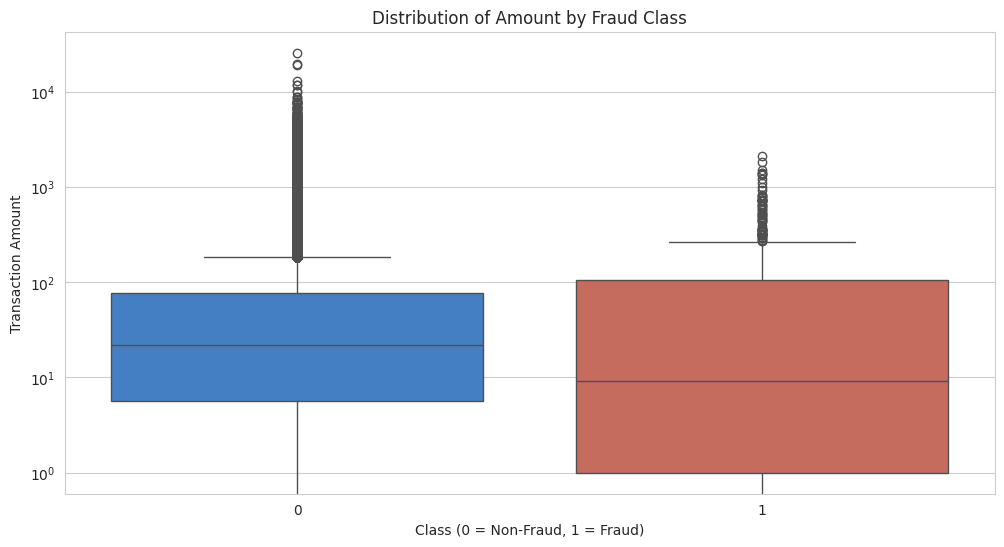

In [ ]:
# create a boxplot to visualize the amount of distribution based on fraud classification
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=['#2f7ed8', '#d6604d'])
plt.title('Distribution of Amount by Fraud Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log') # Use log scale for better visualization of outliers

Text(0, 0.5, 'Frequency')

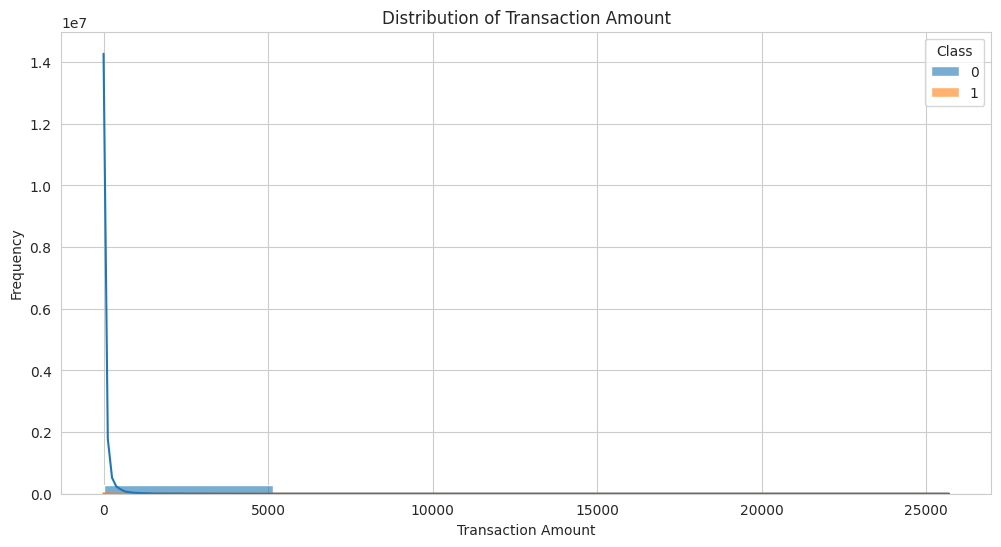

In [ ]:
# create a histogram to visualize the distribution of amount
plt.figure(figsize=(12, 6))
sns.histplot(x ='Amount', hue='Class', data=df, bins=5, kde=True, color=['#2f7ed8', '#d6604d'], alpha=0.6)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

Insights:

Comparison of Transaction Amounts: The boxplot allows us to visually compare the median and interquartile range of transaction amounts for fraudulent and non-fraudulent transactions.



Transaction Amount Frequency: The histogram provides insights into how frequently different transaction amounts occur, indicating whether certain amounts are more commonly associated with fraud.

#Scaling : Time and Amount

Scaling ensures no one feature (like an amount in dollars) dominates the others (like transformed features from PCA).


Why Choose These Scalers? Amount with RobustScaler: Financial transactions (amounts) often have extreme outliers (e.g., very large purchases), so RobustScaler helps minimize the effect of these outliers while still scaling the data appropriately.

Time with StandardScaler: Time differences between transactions may not have extreme outliers and are likely to follow a relatively normal distribution, so StandardScaler is a good choice to standardize these values.

In [ ]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount','Hour','Fraud_Spike'], axis=1, inplace=True)


Text(0.5, 1.0, 'Correlation Matrix')

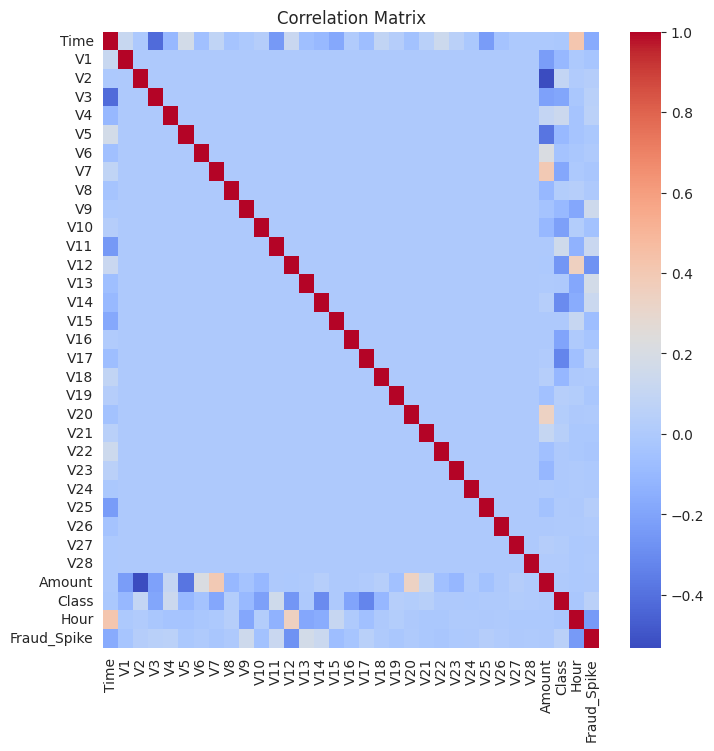

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')

#Train Test Split

In [ ]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227845 entries, 265518 to 17677
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             227845 non-null  float64
 1   V2             227845 non-null  float64
 2   V3             227845 non-null  float64
 3   V4             227845 non-null  float64
 4   V5             227845 non-null  float64
 5   V6             227845 non-null  float64
 6   V7             227845 non-null  float64
 7   V8             227845 non-null  float64
 8   V9             227845 non-null  float64
 9   V10            227845 non-null  float64
 10  V11            227845 non-null  float64
 11  V12            227845 non-null  float64
 12  V13            227845 non-null  float64
 13  V14            227845 non-null  float64
 14  V15            227845 non-null  float64
 15  V16            227845 non-null  float64
 16  V17            227845 non-null  float64
 17  V18            227845 non-null

#Initializing Stratified K-Fold Cross-Validation on the oversampled training data(with Random OverSampling and SMOTE)




In [ ]:
#Random OverSampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train,y_train)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After random oversampling:\n", y_train_over.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())

# Stratified K-Fold initialization
stratified_kfold = StratifiedKFold(n_splits= 3, shuffle=True, random_state=42)

After random oversampling:
 Class
0    227451
1    227451
Name: count, dtype: int64
After SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))


Baseline Accuracy: 0.9983


#Logistic Regression with Random OverSampling





In [ ]:
skf = LogisticRegression()

In [ ]:
#generally not needed step
cv_acc_scores1 = cross_val_score(skf,X_train_over,y_train_over, cv=stratified_kfold, n_jobs = -1)
print(cv_acc_scores1)

cv_acc_scores2 = cross_val_score(skf,X_train_smote,y_train_smote, cv=stratified_kfold, n_jobs = -1)
print(cv_acc_scores2)

[0.95073005 0.94972763 0.95059156]
[0.95383621 0.95317673 0.95366475]


Use GridSearchCV to find the best parameters.


In [ ]:
from sklearn.model_selection import GridSearchCV

 #Logistic Regression

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }

#params = {
   # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
   # 'C': [0.01, 0.1, 1, 10, 100,1000],
   # 'solver': ['lbfgs', 'saga', 'liblinear'],
   # 'l1_ratio': [0, 0.5, 1]  # l1_ratio is only used if penalty is 'elasticnet'
#}


In [ ]:
model = GridSearchCV(
    skf,
    param_grid =  params,
    cv = stratified_kfold,
    n_jobs = -1,
    verbose = 1,
)
model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [ ]:
model.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,1.189035,0.213241,0.025804,0.002890,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.969728,0.970111,0.970836,0.970225,0.000460,1
7,2.589175,0.442675,0.039713,0.007342,1.00,l2,"{'C': 1, 'penalty': 'l2'}",0.969304,0.969364,0.970675,0.969781,0.000632,2
5,1.320693,0.100793,0.021476,0.001409,0.10,l2,"{'C': 0.1, 'penalty': 'l2'}",0.969304,0.969425,0.970594,0.969774,0.000582,3
9,2.587161,0.791083,0.021540,0.000479,10.00,l2,"{'C': 10, 'penalty': 'l2'}",0.969284,0.969344,0.970655,0.969761,0.000632,4
13,2.175376,0.395915,0.020090,0.002228,1000.00,l2,"{'C': 1000, 'penalty': 'l2'}",0.969324,0.969324,0.970614,0.969754,0.000608,5


In [ ]:
model.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
acc_train = accuracy_score(y_train_over,model.predict(X_train_over))
acc_test = accuracy_score(y_test,model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.97
Test Accuracy: 0.98


In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     18593
         1.0       0.10      0.93      0.18        43

    accuracy                           0.98     18636
   macro avg       0.55      0.96      0.58     18636
weighted avg       1.00      0.98      0.99     18636



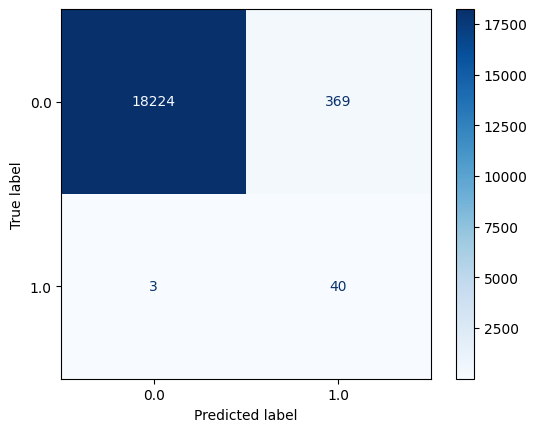

In [ ]:
c=confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
disp.plot(cmap='Blues', values_format='d');

Strengths: The model has a high recall for the minority class, which is crucial in fraud detection (better to catch most frauds, even at the cost of false positives).
Excellent performance on the majority class.

Weaknesses: Very low precision for the minority class means the model generates a lot of false positives, which can lead to inefficiency and unnecessary alarms in a real-world system.
The model is biased due to the extreme imbalance in the dataset.

In [ ]:
def make_cnf_matrix(threshold):

    y_predict_proba = model.predict_proba(X_test)[:,-1] #all rows of the second column,which contains the prob. of the positive class
    y_pred = y_predict_proba > threshold
    c = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
    disp.plot(cmap='Blues', values_format='d');
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    print(classification_report(y_test, y_pred))

    pass


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     18593
         1.0       0.17      0.91      0.28        43

    accuracy                           0.99     18636
   macro avg       0.58      0.95      0.64     18636
weighted avg       1.00      0.99      0.99     18636



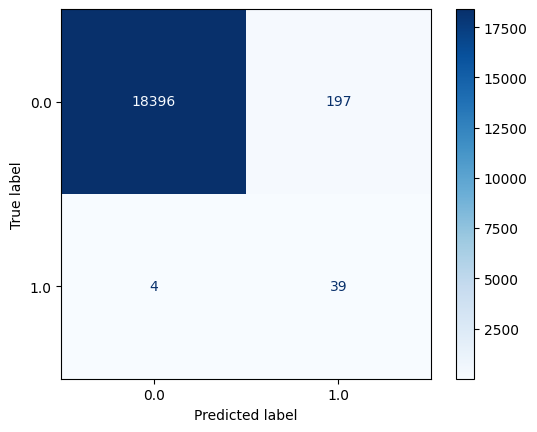

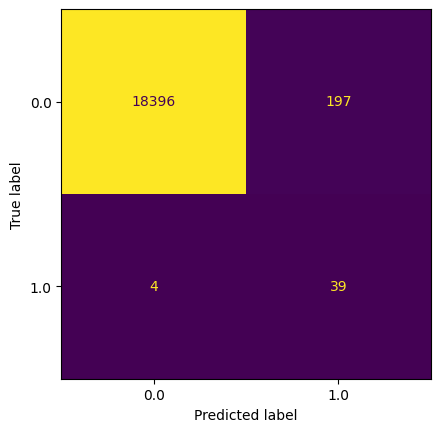

In [ ]:
make_cnf_matrix(0.8)

In [ ]:
from sklearn.metrics import RocCurveDisplay  # Import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

NameError: name 'model' is not defined

#SUPPORT VECTOR CLASSIFIER WITH SMOTE

Since our dataset is HUGE, and SVC and Random Forest Classifier are computationally really heavy, we will use stratified sampling and work on a subset of the data rather than the whole data.

In [ ]:
#Stratified Sampling
# Reduce dataset size while maintaining class distribution
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)# Adjust sample size (10% here)

print("After stratified sampling:\n", y_sampled.value_counts())

After stratified sampling:
 Class
0    28431
1       49
Name: count, dtype: int64


In [ ]:
# Oversampling (SMOTE)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sampled, y_sampled)

print("After resampling:\n", y_resampled.value_counts())

After resampling:
 Class
0    28431
1    28431
Name: count, dtype: int64


In [ ]:
svc = SVC(probability=True)

BASIC MODEL

In [ ]:
svc.fit(X_resampled,y_resampled)

SVC()

In [ ]:
acc_train = accuracy_score(y_resampled,svc.predict(X_resampled))
acc_test = accuracy_score(y_test,svc.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9938
Test Accuracy: 0.9864


In [ ]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.76      0.16        98

    accuracy                           0.99     56962
   macro avg       0.54      0.87      0.58     56962
weighted avg       1.00      0.99      0.99     56962



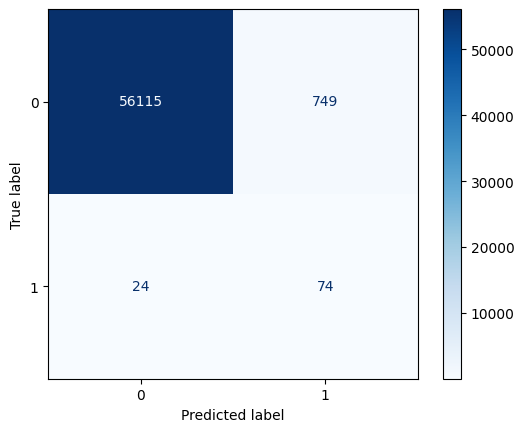

In [ ]:
c=confusion_matrix(y_test, svc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=svc.classes_)  # Assuming 'model' has 'classes_' attribute
disp.plot(cmap='Blues', values_format='d');

In [ ]:
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }

In [ ]:
model = GridSearchCV(
    svc,
    param_grid =  params,
    cv = stratified_kfold,
    n_jobs = -1,
    verbose = 1
)
model

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=1)

In [ ]:
model.fit(X_resampled,y_resampled)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=1)

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,5.494060,1.175235,0.750626,0.325093,1000.0,{'C': 1000},0.999367,0.999367,0.999736,0.999490,0.000174,1
5,4.935705,0.819872,1.247393,0.034759,100.0,{'C': 100},0.998787,0.998839,0.998681,0.998769,0.000066,2
4,7.646247,1.359498,3.342868,0.327199,10.0,{'C': 10},0.995990,0.995726,0.995938,0.995885,0.000114,3
3,17.215930,1.744817,7.572998,1.256558,1.0,{'C': 1},0.993985,0.993669,0.992877,0.993511,0.000466,4
2,25.184445,1.473529,16.476673,0.611102,0.1,{'C': 0.1},0.972460,0.975150,0.973620,0.973743,0.001102,5


In [ ]:
acc_train = accuracy_score(y_resampled,model.predict(X_resampled))
acc_test = accuracy_score(y_test,model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9998
Test Accuracy: 0.9983


In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.47      0.49        98

    accuracy                           1.00     56962
   macro avg       0.76      0.73      0.75     56962
weighted avg       1.00      1.00      1.00     56962



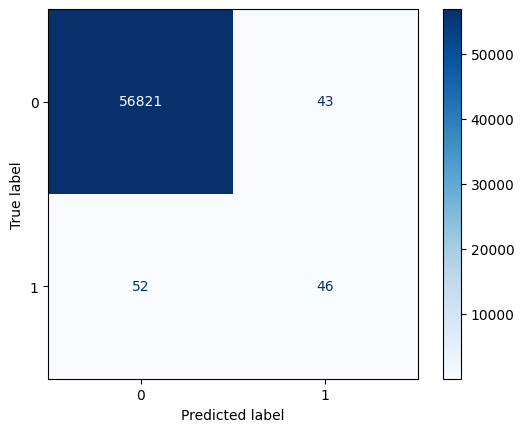

In [ ]:
c=confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
disp.plot(cmap='Blues', values_format='d');

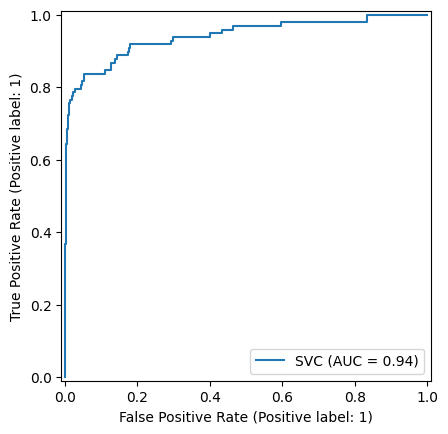

In [ ]:
from sklearn.metrics import RocCurveDisplay  # Import RocCurveDisplay

RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

In [ ]:
def make_cnf_matrix(threshold):

    y_predict_proba = model.predict_proba(X_test)[:,-1] #all rows of the second column,which contains the prob. of the positive class
    y_pred = y_predict_proba > threshold
    c = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
    disp.plot(cmap='Blues', values_format='d');
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    print(classification_report(y_test, y_pred))

    pass

In [ ]:
make_cnf_matrix(0.6)

AttributeError: This 'GridSearchCV' has no attribute 'predict_proba'

Result

#Random Forest Classifier on data oversampled with SMOTE

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
#optional step
cv_acc_scores2 = cross_val_score(rf,X_resampled,y_resampled, cv=stratified_kfold, n_jobs = -1)
print(cv_acc_scores2)

[0.99978896 0.99978896 1.        ]


Basic Model

In [ ]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
acc_train = accuracy_score(y_resampled,rf.predict(X_resampled))
acc_test = accuracy_score(y_test,rf.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9994


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))
print(f1_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

0.8064516129032258


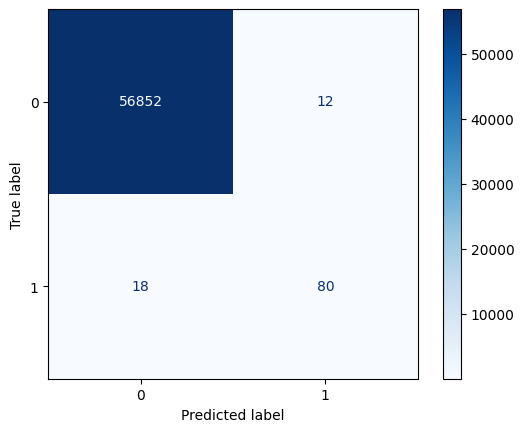

In [ ]:
c=confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=rf.classes_)  # Assuming 'model' has 'classes_' attribute
disp.plot(cmap='Blues', values_format='d');

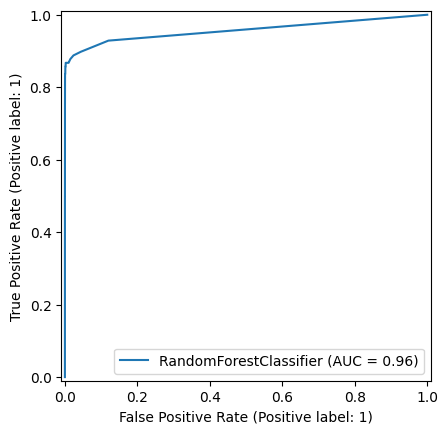

In [ ]:
from sklearn.metrics import RocCurveDisplay  # Import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [ ]:
def make_cnf_matrix(threshold):

    y_predict_proba = rf.predict_proba(X_test)[:,-1] #all rows of the second column,which contains the prob. of the positive class
    y_pred = y_predict_proba > threshold
    c = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=rf.classes_)  # Assuming 'model' has 'classes_' attribute
    disp.plot(cmap='Blues', values_format='d');
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    print(classification_report(y_test, y_pred))


    pass

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



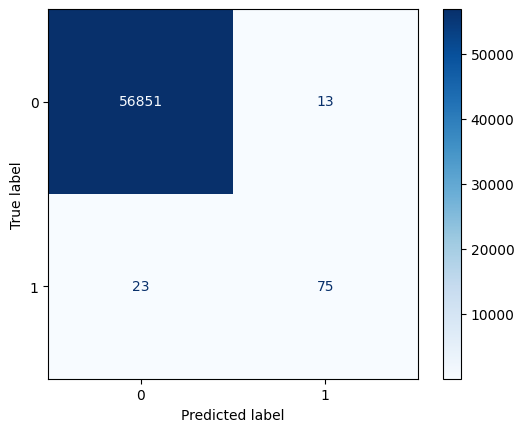

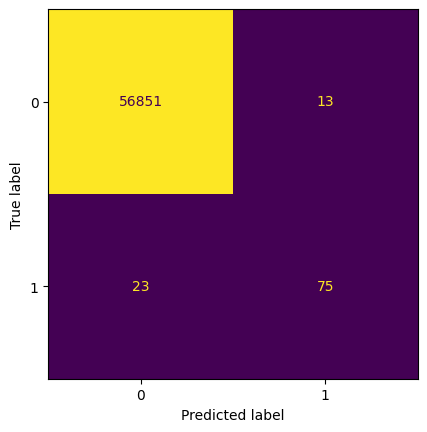

In [ ]:
make_cnf_matrix(0.5)

In [ ]:
params = {
    'n_estimators': [100, 200, 300, 500],            # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],          # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 50],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]                       # Whether bootstrap samples are used when building trees
}


In [ ]:
model = RandomizedSearchCV(
    rf,
    param_distributions =  params,
    cv = stratified_kfold,
    n_iter = 5, # Number of random combinations to try
    scoring='roc_auc',
    n_jobs = -1,
    verbose = 1
)
model

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   scoring='roc_auc', verbose=1)

In [ ]:
model.fit(X_resampled,y_resampled)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,40.584174,1.056131,0.218980,0.004983,100,5,1,log2,None,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.999998,1.00000,1.000000,0.999999,0.000001,1
2,40.756507,0.743952,0.373083,0.105489,100,10,2,log2,20,False,"{'n_estimators': 100, 'min_samples_split': 10,...",0.999997,1.00000,1.000000,0.999999,0.000001,2
0,33.491726,1.009235,0.338709,0.094368,100,10,1,sqrt,30,True,"{'n_estimators': 100, 'min_samples_split': 10,...",0.999996,1.00000,1.000000,0.999999,0.000002,3
3,198.451655,5.541466,1.053839,0.091823,500,10,4,log2,50,False,"{'n_estimators': 500, 'min_samples_split': 10,...",0.999992,1.00000,1.000000,0.999997,0.000004,4
1,193.360623,2.602297,0.154874,0.006360,100,2,4,None,30,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.999877,0.99999,0.999998,0.999955,0.000055,5


In [ ]:
acc_train = accuracy_score(y_resampled,model.predict(X_resampled))
acc_test = accuracy_score(y_test,model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9994


In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.76      0.81        98

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



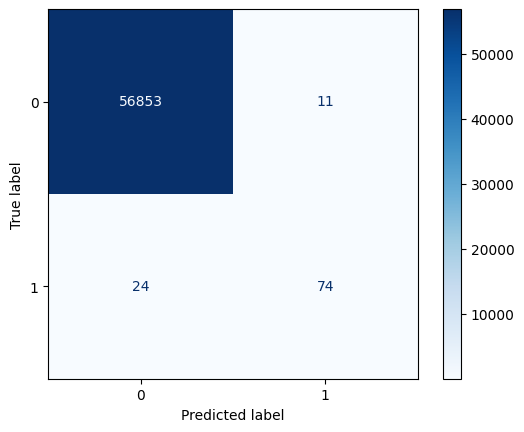

In [ ]:
c=confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
disp.plot(cmap='Blues', values_format='d');

In [ ]:
def make_cnf_matrix(threshold):

    y_predict_proba = model.predict_proba(X_test)[:,-1] #all rows of the second column,which contains the prob. of the positive class
    y_pred = y_predict_proba > threshold
    c = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
    disp.plot(cmap='Blues', values_format='d');
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)

    pass


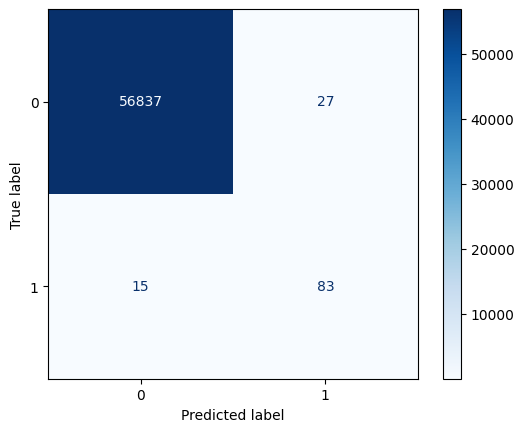

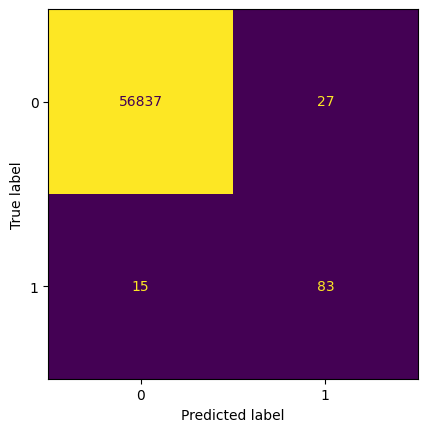

In [ ]:
make_cnf_matrix(0.2)

#GRADIENT BOOSTING

In [ ]:
gbc = GradientBoostingClassifier()


In [ ]:
gbc.fit(X_train, y_train)

# Predictions
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[56848    16]
 [   80    18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score: 0.3468859283302516


In [ ]:
acc_train = accuracy_score(y_resampled,model.predict(X_resampled))
acc_test = accuracy_score(y_test,model.predict(X_test))

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9994


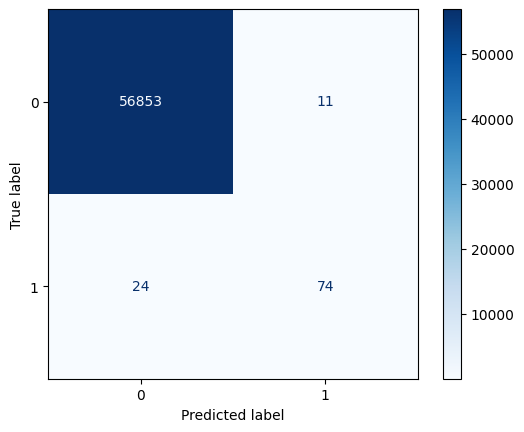

In [ ]:
c=confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)  # Assuming 'model' has 'classes_' attribute
disp.plot(cmap='Blues', values_format='d');

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 10],
    'subsample': [0.8, 1.0]
}

In [ ]:
# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=stratified_kfold,
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:\n", grid_search.best_params_)


In [ ]:
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train, y_train)

# Predictions
y_pred = best_gbc.predict(X_test)
y_pred_proba = best_gbc.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
